In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
flights=pd.read_csv("flights.csv")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1252\2468595950.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights=pd.read_csv("flights.csv")


In [63]:
flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [4]:
flights=flights.sample(n=100000)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
4164022,2015,9,16,3,EV,5223,N607LR,ATL,GRB,1925,...,2023.0,-23.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5544435,2015,12,14,1,OO,7389,N886AS,SLC,CPR,1100,...,1311.0,52.0,0,0,NaN,50.0,0.0,0.0,0.0,2.0
3993245,2015,9,5,6,WN,6011,N8631A,SAN,BWI,1235,...,2036.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
392740,2015,1,26,1,MQ,3549,N635MQ,MIA,CVG,1850,...,2210.0,35.0,0,0,NaN,7.0,0.0,28.0,0.0,0.0
1544388,2015,4,9,4,EV,3932,N14991,ORD,IND,1610,...,2109.0,173.0,0,0,NaN,0.0,0.0,0.0,173.0,0.0


In [5]:
flights.shape

(100000, 31)

In [6]:
flights.isnull().values.any()

True

In [7]:
#Checking how many null values are there in each columns
flights.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER              252
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME          1507
DEPARTURE_DELAY         1507
TAXI_OUT                1559
WHEELS_OFF              1559
SCHEDULED_TIME             0
ELAPSED_TIME            1817
AIR_TIME                1817
DISTANCE                   0
WHEELS_ON               1628
TAXI_IN                 1628
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            1628
ARRIVAL_DELAY           1817
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    98420
AIR_SYSTEM_DELAY       81955
SECURITY_DELAY         81955
AIRLINE_DELAY          81955
LATE_AIRCRAFT_DELAY    81955
WEATHER_DELAY          81955
dtype: int64

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='CANCELLATION_REASON', ylabel='count'>

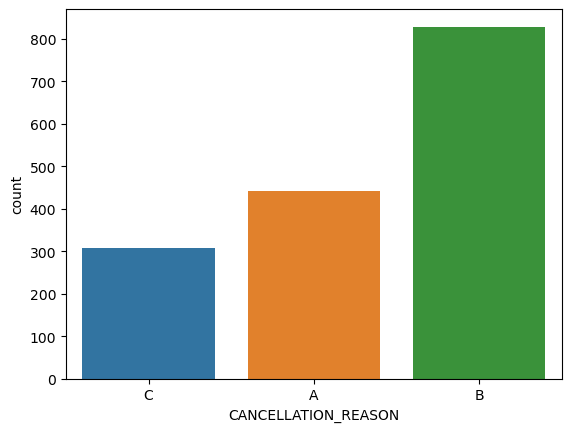

In [8]:
sns.countplot(x='CANCELLATION_REASON',data=flights)

### Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security

We can observe from graph easily that mostly weather is responsible for delays of flight.

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

<Axes: xlabel='MONTH', ylabel='count'>

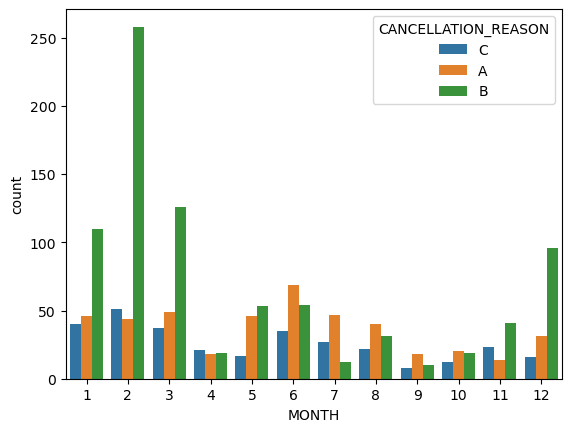

In [9]:
sns.countplot(x="MONTH",hue="CANCELLATION_REASON",data=flights)

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


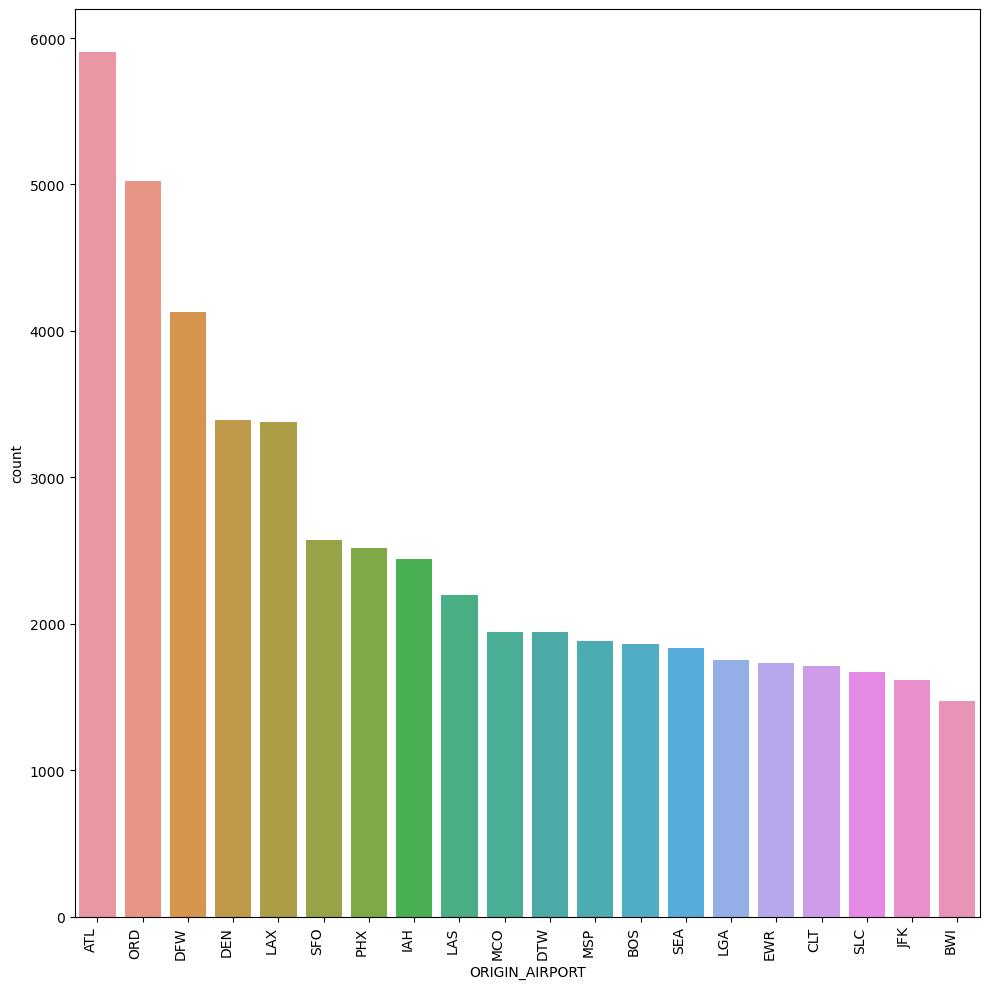

In [10]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=flights['ORIGIN_AIRPORT'], data =flights, order=flights['ORIGIN_AIRPORT'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

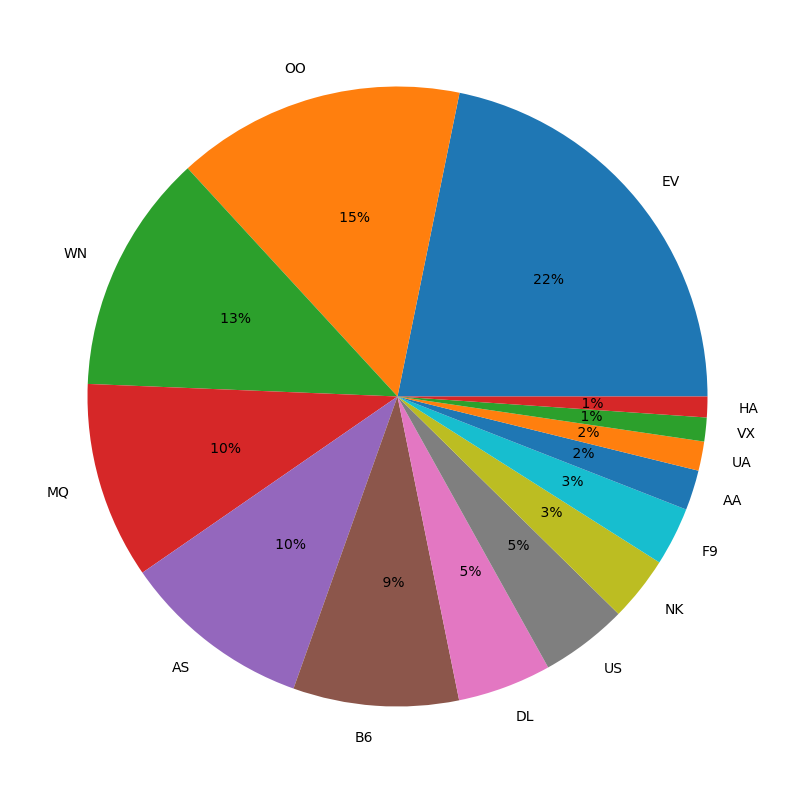

In [11]:
axis = plt.subplots(figsize=(10,14))
Name = flights["AIRLINE"].unique()
size = flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object


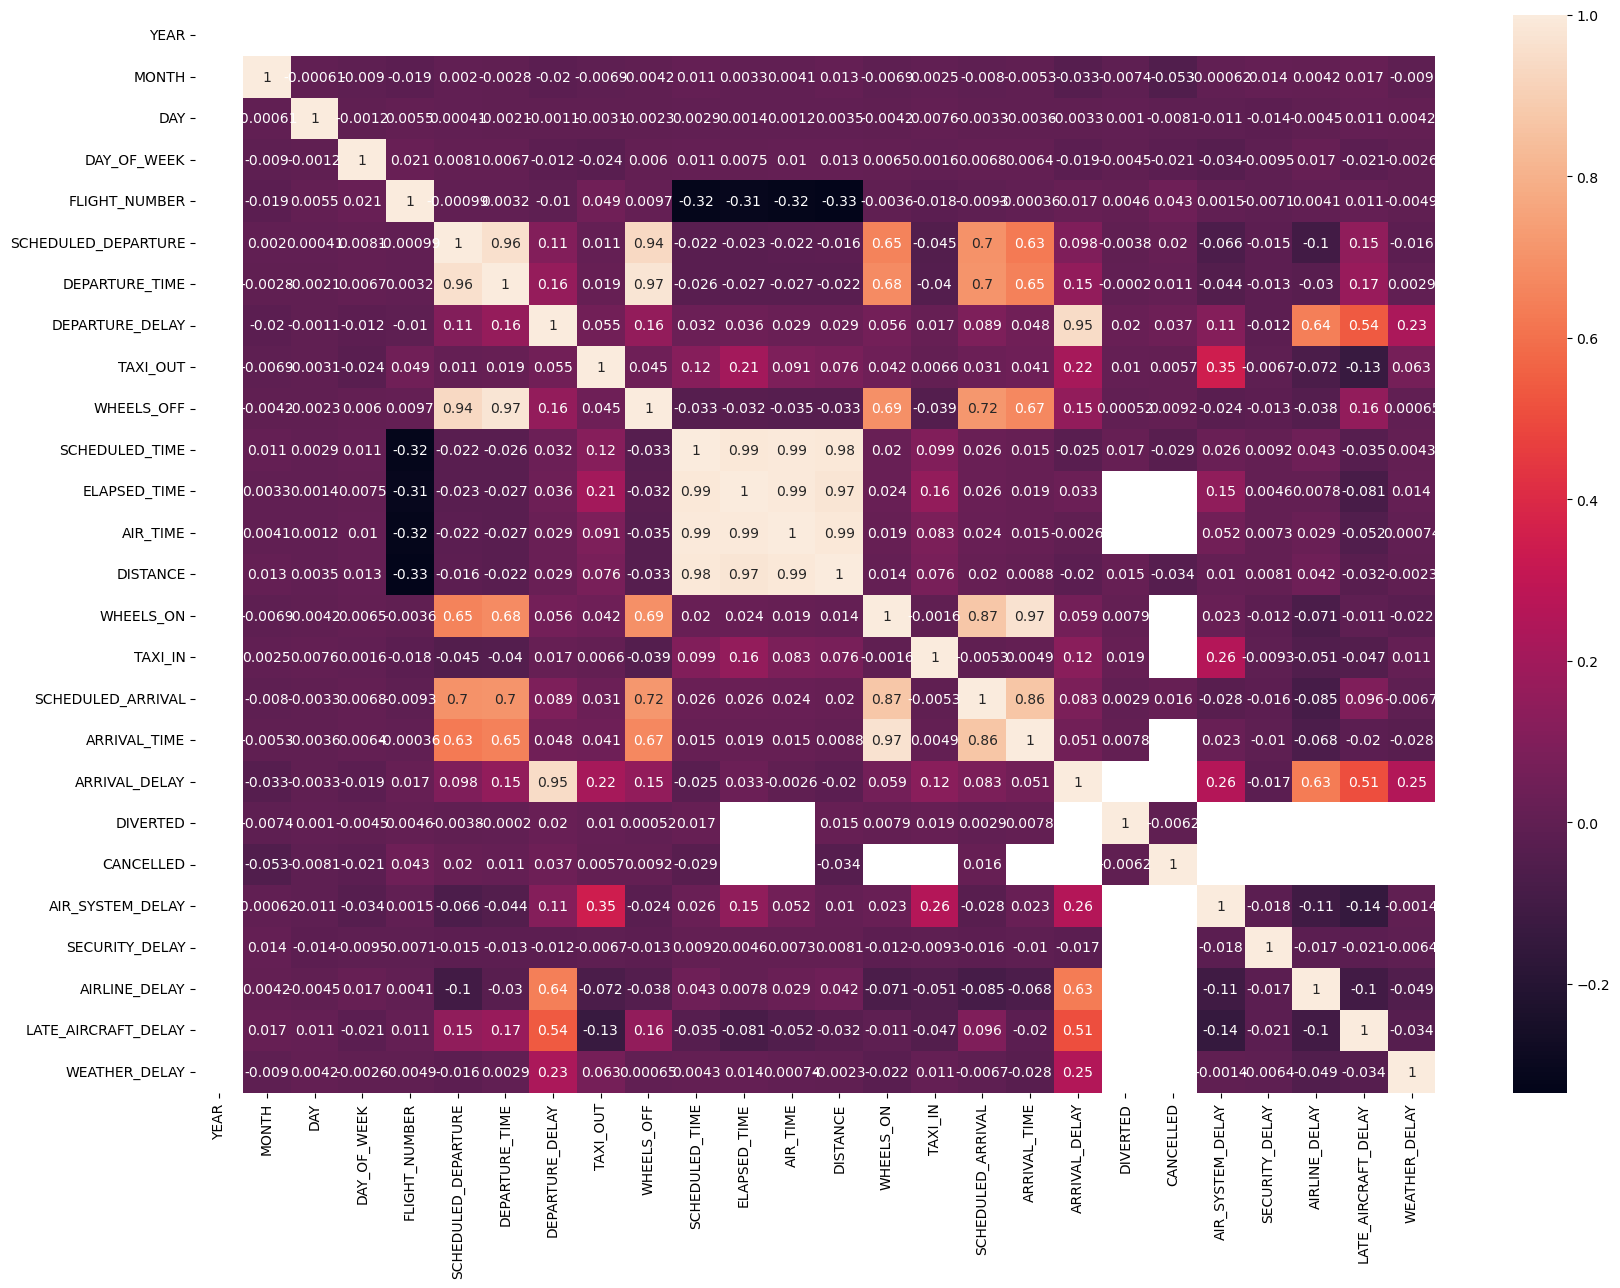

In [12]:
print(flights.dtypes)

# Select only numeric columns

numeric_columns = flights.select_dtypes(include=['float64', 'int64'])

# Create a heatmap
axis = plt.subplots(figsize=(20, 14))
sns.heatmap(numeric_columns.corr(), annot=True)
plt.show()

Very High Correlation Between Arrival Delay and Departure Delay¶

It shows that maximum of the Arrival Delays are due to the Departure Delays.

In [13]:
corr=numeric_columns.corr()

In [14]:
corr

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,-0.000605,-0.009047,-0.018982,0.001960,-0.002769,-0.019625,-0.006949,-0.004186,...,-0.007972,-0.005286,-0.033328,-0.007411,-0.052981,-0.000617,0.013743,0.004244,0.016690,-0.009042
DAY,NaN,-0.000605,1.000000,-0.001160,0.005456,0.000411,-0.002083,-0.001135,-0.003058,-0.002253,...,-0.003278,-0.003583,-0.003329,0.001029,-0.008055,-0.011183,-0.013908,-0.004467,0.011347,0.004228
DAY_OF_WEEK,NaN,-0.009047,-0.001160,1.000000,0.020666,0.008107,0.006727,-0.012015,-0.023658,0.005986,...,0.006850,0.006412,-0.018849,-0.004475,-0.021372,-0.033678,-0.009543,0.016753,-0.020704,-0.002589
FLIGHT_NUMBER,NaN,-0.018982,0.005456,0.020666,1.000000,-0.000994,0.003162,-0.010370,0.048530,0.009747,...,-0.009326,-0.000357,0.017221,0.004596,0.042560,0.001472,-0.007057,0.004112,0.010964,-0.004857
SCHEDULED_DEPARTURE,NaN,0.001960,0.000411,0.008107,-0.000994,1.000000,0.960225,0.106291,0.010758,0.936188,...,0.698690,0.626836,0.097634,-0.003821,0.019705,-0.066008,-0.015399,-0.101824,0.146913,-0.016140
DEPARTURE_TIME,NaN,-0.002769,-0.002083,0.006727,0.003162,0.960225,1.000000,0.163659,0.018756,0.974889,...,0.704001,0.649713,0.153653,-0.000201,0.010741,-0.043758,-0.013321,-0.030496,0.172226,0.002922
DEPARTURE_DELAY,NaN,-0.019625,-0.001135,-0.012015,-0.010370,0.106291,0.163659,1.000000,0.054631,0.159884,...,0.089498,0.047683,0.946383,0.020098,0.037061,0.108880,-0.011525,0.642408,0.539694,0.229450
TAXI_OUT,NaN,-0.006949,-0.003058,-0.023658,0.048530,0.010758,0.018756,0.054631,1.000000,0.044943,...,0.030880,0.040901,0.217331,0.009983,0.005685,0.345121,-0.006747,-0.072425,-0.133369,0.062664
WHEELS_OFF,NaN,-0.004186,-0.002253,0.005986,0.009747,0.936188,0.974889,0.159884,0.044943,1.000000,...,0.716120,0.667115,0.153987,0.000517,0.009241,-0.024213,-0.013087,-0.038121,0.155320,0.000646


In [15]:
variables_to_remove=["YEAR","FLIGHT_NUMBER","TAIL_NUMBER","DEPARTURE_TIME","TAXI_OUT","WHEELS_OFF","ELAPSED_TIME","AIR_TIME","WHEELS_ON","TAXI_IN","ARRIVAL_TIME","DIVERTED","CANCELLED","CANCELLATION_REASON","AIR_SYSTEM_DELAY", "SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY","SCHEDULED_TIME","SCHEDULED_ARRIVAL"]
flights.drop(variables_to_remove,axis=1,inplace= True)
flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [16]:
airport = pd.read_csv('airports.csv')
airport

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [17]:
flights.loc[~flights.ORIGIN_AIRPORT.isin(airport.IATA_CODE.values),'ORIGIN_AIRPORT']='OTHER'
flights.loc[~flights.DESTINATION_AIRPORT.isin(airport.IATA_CODE.values),'DESTINATION_AIRPORT']='OTHER'
flights
     

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
4164022,9,16,3,EV,ATL,GRB,1925,-6.0,774,-23.0
5544435,12,14,1,OO,SLC,CPR,1100,2.0,320,52.0
3993245,9,5,6,WN,SAN,BWI,1235,18.0,2295,1.0
392740,1,26,1,MQ,MIA,CVG,1850,28.0,948,35.0
1544388,4,9,4,EV,ORD,IND,1610,183.0,177,173.0
...,...,...,...,...,...,...,...,...,...,...
949076,3,4,3,B6,JFK,FLL,740,-3.0,1069,-23.0
3840003,8,26,3,WN,ATL,SAT,2050,167.0,874,171.0
2793698,6,25,4,DL,MSP,BZN,903,14.0,874,2.0
3970073,9,3,4,OO,SFO,SBA,2243,-5.0,262,-18.0


In [18]:
print(flights.ORIGIN_AIRPORT.nunique())
print(flights.DESTINATION_AIRPORT.nunique())
print(flights.AIRLINE.nunique())
     

320
321
14


In [19]:
flights=flights.dropna()
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
4164022,9,16,3,EV,ATL,GRB,1925,-6.0,774,-23.0
5544435,12,14,1,OO,SLC,CPR,1100,2.0,320,52.0
3993245,9,5,6,WN,SAN,BWI,1235,18.0,2295,1.0
392740,1,26,1,MQ,MIA,CVG,1850,28.0,948,35.0
1544388,4,9,4,EV,ORD,IND,1610,183.0,177,173.0
...,...,...,...,...,...,...,...,...,...,...
949076,3,4,3,B6,JFK,FLL,740,-3.0,1069,-23.0
3840003,8,26,3,WN,ATL,SAT,2050,167.0,874,171.0
2793698,6,25,4,DL,MSP,BZN,903,14.0,874,2.0
3970073,9,3,4,OO,SFO,SBA,2243,-5.0,262,-18.0


In [20]:
flights.shape

(98183, 10)

In [21]:
df=pd.DataFrame(flights)
df["DAY_OF_WEEK"]= df["DAY_OF_WEEK"].astype(str)
df["DAY_OF_WEEK"].replace({'1':"SUNDAY", "2": "MONDAY", "3": "TUESDAY", "4":"WEDNESDAY", "5":"THURSDAY", "6":"FRIDAY", "7":"SATURDAY"},inplace=True)
df

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
4164022,9,16,TUESDAY,EV,ATL,GRB,1925,-6.0,774,-23.0
5544435,12,14,SUNDAY,OO,SLC,CPR,1100,2.0,320,52.0
3993245,9,5,FRIDAY,WN,SAN,BWI,1235,18.0,2295,1.0
392740,1,26,SUNDAY,MQ,MIA,CVG,1850,28.0,948,35.0
1544388,4,9,WEDNESDAY,EV,ORD,IND,1610,183.0,177,173.0
...,...,...,...,...,...,...,...,...,...,...
949076,3,4,TUESDAY,B6,JFK,FLL,740,-3.0,1069,-23.0
3840003,8,26,TUESDAY,WN,ATL,SAT,2050,167.0,874,171.0
2793698,6,25,WEDNESDAY,DL,MSP,BZN,903,14.0,874,2.0
3970073,9,3,WEDNESDAY,OO,SFO,SBA,2243,-5.0,262,-18.0


In [22]:
dums = ['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DAY_OF_WEEK']
df_cat=pd.get_dummies(df[dums],drop_first=True)
df_cat

,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
4164022,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5544435,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3993245,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
392740,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1544388,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949076,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3840003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2793698,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3970073,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [23]:
df_cat.columns

Index(['AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9',
       'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO', 'AIRLINE_UA',
       ...
       'DESTINATION_AIRPORT_WYS', 'DESTINATION_AIRPORT_XNA',
       'DESTINATION_AIRPORT_YAK', 'DESTINATION_AIRPORT_YUM',
       'DAY_OF_WEEK_MONDAY', 'DAY_OF_WEEK_SATURDAY', 'DAY_OF_WEEK_SUNDAY',
       'DAY_OF_WEEK_THURSDAY', 'DAY_OF_WEEK_TUESDAY', 'DAY_OF_WEEK_WEDNESDAY'],
      dtype='object', length=658)

In [24]:
df.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [25]:
flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [26]:
var_to_remove=["DAY_OF_WEEK","AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT"]
df.drop(var_to_remove,axis=1,inplace=True)
df

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
4164022,9,16,1925,-6.0,774,-23.0
5544435,12,14,1100,2.0,320,52.0
3993245,9,5,1235,18.0,2295,1.0
392740,1,26,1850,28.0,948,35.0
1544388,4,9,1610,183.0,177,173.0
...,...,...,...,...,...,...
949076,3,4,740,-3.0,1069,-23.0
3840003,8,26,2050,167.0,874,171.0
2793698,6,25,903,14.0,874,2.0
3970073,9,3,2243,-5.0,262,-18.0


In [27]:
data=pd.concat([df,df_cat],axis=1)
data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
4164022,9,16,1925,-6.0,774,-23.0,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
5544435,12,14,1100,2.0,320,52.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3993245,9,5,1235,18.0,2295,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
392740,1,26,1850,28.0,948,35.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1544388,4,9,1610,183.0,177,173.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949076,3,4,740,-3.0,1069,-23.0,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3840003,8,26,2050,167.0,874,171.0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2793698,6,25,903,14.0,874,2.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3970073,9,3,2243,-5.0,262,-18.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [28]:
data.shape

(98183, 664)

In [29]:
final_data = data.sample(n=60000)
final_data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
2167465,5,18,1100,-3.0,577,-10.0,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2652338,6,16,2020,62.0,600,46.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4399110,10,1,1825,4.0,220,4.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4018581,9,7,1254,-5.0,1069,-5.0,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
1420337,4,2,500,-7.0,867,-12.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449497,1,30,1300,97.0,337,105.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1312768,3,26,1205,19.0,862,18.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3628808,8,13,2210,0.0,594,1.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4472241,10,6,1338,-8.0,678,-18.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [30]:
final_data.shape

(60000, 664)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [32]:
X=final_data.drop("DEPARTURE_DELAY",axis=1)
Y=final_data.DEPARTURE_DELAY

In [33]:
X

,MONTH,DAY,SCHEDULED_DEPARTURE,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
2167465,5,18,1100,577,-10.0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2652338,6,16,2020,600,46.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4399110,10,1,1825,220,4.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4018581,9,7,1254,1069,-5.0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1420337,4,2,500,867,-12.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449497,1,30,1300,337,105.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1312768,3,26,1205,862,18.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3628808,8,13,2210,594,1.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4472241,10,6,1338,678,-18.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [34]:
Y

2167465    -3.0
2652338    62.0
4399110     4.0
4018581    -5.0
1420337    -7.0
           ... 
449497     97.0
1312768    19.0
3628808     0.0
4472241    -8.0
228381     47.0
Name: DEPARTURE_DELAY, Length: 60000, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [36]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [37]:
y_pred = reg_rf.predict(X_test)

In [38]:
reg_rf.score(X_train,y_train)

0.9894149543321833

In [39]:
reg_rf.score(X_test,y_test)

0.9277005382471326

In [40]:
metrics.r2_score(y_test,y_pred)

0.9277005382471326

In [41]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 6.0275675
MSE: 99.216959875
RMSE: 9.9607710482171


In [42]:
pp=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
pp

,Actual,Predicted
3721062,-6.0,14.52
1830828,-3.0,-0.13
1294361,-4.0,-5.28
2288711,21.0,-0.64
1954349,-7.0,-3.65
...,...,...
5335646,52.0,48.35
3718460,-2.0,-5.66
388701,-6.0,-3.23
2207609,28.0,10.66


In [43]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [44]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [45]:
# Random search of parameters, using 5 fold cross validation,search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
 

In [46]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   9.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   9.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   9.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   9.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   8.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=  16.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=  17.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Lenovo\anaconda3\Lib\site-pack

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 27, 44, 61, 79, 96,
                                                         113, 130, 148, 165,
                                                         182, 200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [47]:
rf_random.best_params_

{'n_estimators': 165,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [48]:
p=rf_random.predict(X_test)

In [49]:
metrics.r2_score(y_test,p)

0.5807042072348993

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test,p))
print('MSE:', metrics.mean_squared_error(y_test,p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,p)))

MAE: 12.305368348878696
MSE: 575.4019855463359
RMSE: 23.987538130169504


In [51]:
zz=pd.DataFrame({'Actual':y_test,'Predicted':p})
zz

,Actual,Predicted
3721062,-6.0,17.947744
1830828,-3.0,4.478605
1294361,-4.0,2.421088
2288711,21.0,3.293897
1954349,-7.0,2.627283
...,...,...
5335646,52.0,19.692778
3718460,-2.0,3.212874
388701,-6.0,5.439374
2207609,28.0,11.676192


In [52]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=0)

In [53]:
GBR=gbr.fit(X_train,y_train)
pre=GBR.predict(X_test)

In [54]:
print('MAE:', metrics.mean_absolute_error(y_test,pre))
print('MSE:', metrics.mean_squared_error(y_test,pre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pre)))

MAE: 5.987063341854328
MSE: 94.18935619588922
RMSE: 9.705120102084734


In [55]:
metrics.r2_score(y_test,pre)

0.9313641562451482

In [56]:
gg=pd.DataFrame({'Actual':y_test,'Predicted':pre})
gg
     

,Actual,Predicted
3721062,-6.0,12.855880
1830828,-3.0,-0.771394
1294361,-4.0,-3.737866
2288711,21.0,-0.295142
1954349,-7.0,-3.627451
...,...,...
5335646,52.0,46.005366
3718460,-2.0,-4.479516
388701,-6.0,-2.750740
2207609,28.0,11.553689


In [57]:
def predict(MONTH, DAY,SCHEDULED_DEPARTURE,DISTANCE, ARRIVAL_DELAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DAY_OF_WEEK):
    AIRLINE_index = np.where(X.columns==AIRLINE)[0][0]
    ORIGIN_index = np.where(X.columns==ORIGIN_AIRPORT)[0][0]
    DESTINATION_index = np.where(X.columns==DESTINATION_AIRPORT)[0][0]
    DAY_OF_WEEK_index = np.where(X.columns==DAY_OF_WEEK)[0][0]
    x= np.zeros(len(X.columns))
    x[0] = MONTH
    x[1] = DAY
    x[2] = SCHEDULED_DEPARTURE
    x[3] = DISTANCE
    x[4] = ARRIVAL_DELAY
    if AIRLINE_index >=0:
        x[AIRLINE_index] = 1
    if ORIGIN_index >=0:
        x[ORIGIN_index] = 1
    if DESTINATION_index >=0:
        x[DESTINATION_index] = 1
    if  DAY_OF_WEEK_index >= 0:
        x[ DAY_OF_WEEK_index] = 1

    return gbr.predict([x])[0]

In [58]:
res= predict(2,15,1515,328,-8.0,'AIRLINE_OO','ORIGIN_AIRPORT_PHX','DESTINATION_AIRPORT_ABQ','DAY_OF_WEEK_TUESDAY')
res

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


-3.804641621708963

In [59]:
if(res<=-15):
  print("Flight is delayed")
else:
  print("Flight is not delayed")

Flight is not delayed
